In [1]:
from openTSNE import TSNE

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

(200, 2)
--------------------------------------------------------------------------------
TSNE(n_components=1, perplexity=66, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 198 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.01 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 1.0740, 50 iterations in 0.0210 sec
Iteration  100, KL divergence 1.0789, 50 iterations in 0.0209 sec
Iteration  150, KL divergence 1.0725, 50 iterations in 0.0209 sec
Iteration  200, KL divergence 1.0761, 50 iterations in 0.0209 sec
Iteration  250, KL divergence 1.0772, 50 iterations in 0.0209 sec
   --> Time elapsed: 0.10 seconds
===> Running optimization with exaggeration=1.00, 

(-2.1992390462712303,
 2.189760953728774,
 -2.1994224902994777,
 2.189577509700526)

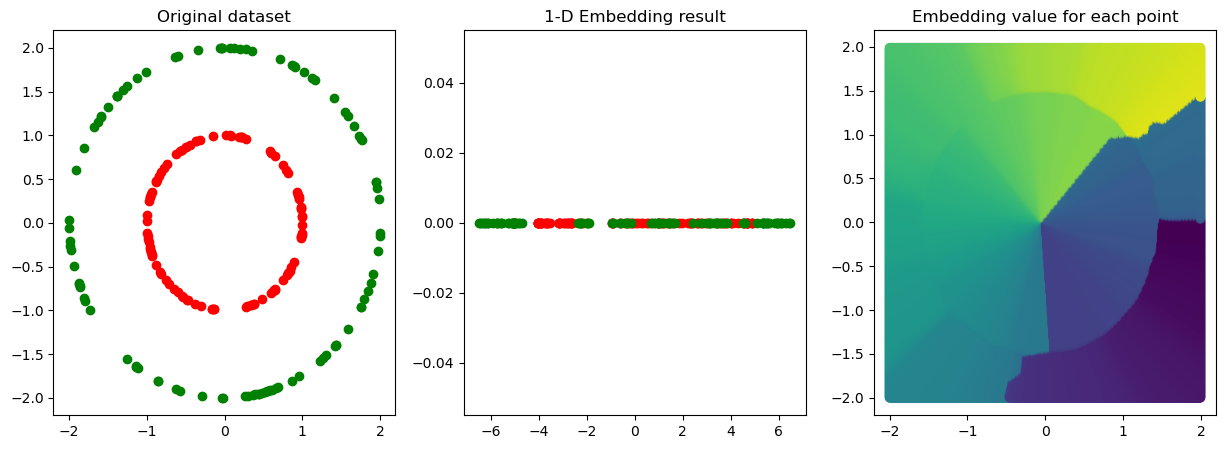

In [3]:
n_samples = 150
n_components = 1

# X, y = datasets.make_circles(
#     n_samples=n_samples, factor=0.5, noise=0.05, random_state=0
# )

def make_circle_data(num_data=100, radius=1):
    rad = np.random.uniform(0, 2 * np.pi, num_data).reshape((-1, 1))
    X = radius * np.hstack((np.cos(rad), np.sin(rad)))

    return X

X_1 = make_circle_data(num_data=100, radius=1)
X_2 = make_circle_data(num_data=100, radius=2)

x_1_num = X_1.shape[0]
x_2_num = X_2.shape[0]

X = np.concatenate((X_1, X_2))
print(X.shape)

X_min, X_max = min(X[:, 0]), max(X[:, 0])
Y_min, Y_max = min(X[:, 1]), max(X[:, 1])

X_axis = np.arange(X_min, X_max, 0.01)
Y_axis = np.arange(Y_min, Y_max, 0.01)

xv, yv = np.meshgrid(X_axis, Y_axis, indexing='ij')
test = np.concatenate((xv.reshape((-1, 1)), yv.reshape((-1, 1))), axis=1)


perplexity = 66

tsne = TSNE(
    n_components=1,
    perplexity=perplexity,
    random_state=42,
    verbose=True
)

Y = tsne.fit(X)


embedding_test = Y.transform(test)

fig, ax = plt.subplots(1,3, figsize=(15, 5))

# Left plot
ax[0].scatter(X[:x_1_num, 0], X[:x_1_num, 1], c="r")
ax[0].scatter(X[x_1_num:, 0], X[x_1_num:, 1], c="g")
ax[0].set_title("Original dataset")
ax[0].axis("tight")

# Middle plot
ax[1].scatter(Y[:x_1_num], np.zeros_like(Y[:x_1_num]), c="r")
ax[1].scatter(Y[x_1_num:], np.zeros_like(Y[x_1_num:]), c="g")
ax[1].set_title("1-D Embedding result")
ax[1].axis("tight")

#Right plot
ax[2].scatter(test[:, 0], test[:, 1], c=embedding_test)
ax[2].set_title("Embedding value for each point")
ax[2].axis("tight")



Perplexity value 100 is too high. Using perplexity 66.33 instead


[[-1.99973905 -1.99992249  2.5       ]
 [-1.99973905 -1.98992249  2.5       ]
 [-1.99973905 -1.97992249  2.5       ]
 ...
 [ 1.99026095  1.97007751  2.5       ]
 [ 1.99026095  1.98007751  2.5       ]
 [ 1.99026095  1.99007751  2.5       ]]
--------------------------------------------------------------------------------
TSNE(n_components=1, perplexity=100, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 199 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.01 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 1.0738, 50 iterations in 0.0207 sec
Iteration  100, KL divergence 1.0204, 50 iterations in 0.0203 sec
Iteration  150, KL divergence 0.9869, 50 iteration

(-2.1992390462712303,
 2.189760953728774,
 -2.1994224902994777,
 2.189577509700526)

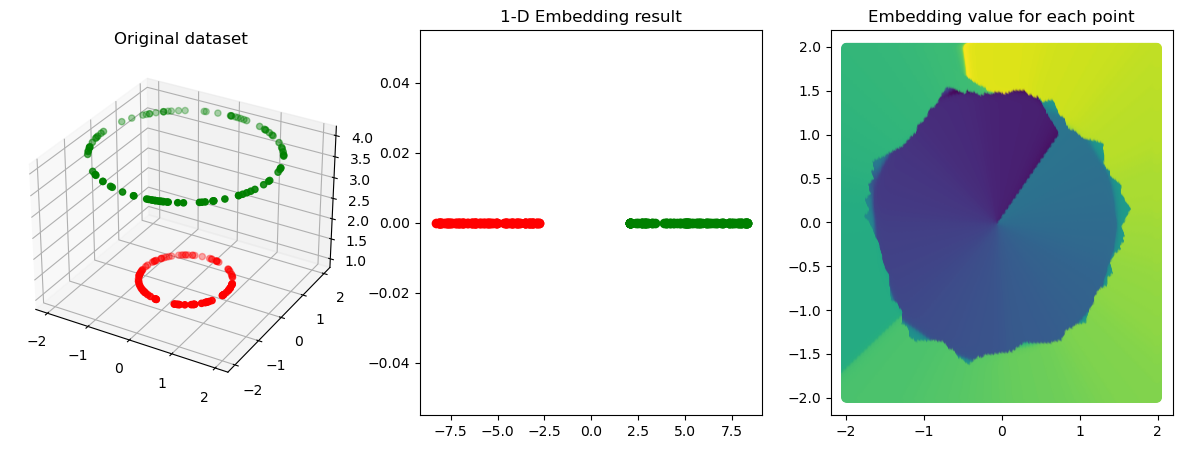

In [4]:
# Now we expand it to 3d and then conduct tSNE
# The value of last dimenstion follows z = x**2 + y**2

X_3d = np.zeros((X.shape[0], X.shape[1]+1))

X_3d[:, :-1] = X
X_3d[:, -1] = (X**2).sum(axis=1)

X_min, X_max = min(X_3d[:, 0]), max(X_3d[:, 0])
Y_min, Y_max = min(X_3d[:, 1]), max(X_3d[:, 1])
Z_min, Z_max = min(X_3d[:, 2]), max(X_3d[:, 2])

X_axis = np.arange(X_min, X_max, 0.01)
Y_axis = np.arange(Y_min, Y_max, 0.01)
Z_axis = np.arange(Z_min, Z_max, 0.01)

xv, yv = np.meshgrid(X_axis, Y_axis, indexing='ij')
test = np.concatenate((xv.reshape((-1, 1)), yv.reshape((-1, 1))), axis=1)
z_coord = 2.5
test_3d = np.zeros((test.shape[0], test.shape[1]+1))
test_3d[:, :2] = test
test_3d[:, 2] = z_coord
print(test_3d)


perplexity = 100

tsne = TSNE(
    n_components=1,
    perplexity=perplexity,
    random_state=42,
    verbose=True
)

Y = tsne.fit(X_3d)


embedding_test = Y.transform(test_3d)

# fig, ax = plt.subplots(1,3, figsize=(15, 5))
fig = plt.figure(figsize = (15, 5))

# Left plot
ax = fig.add_subplot(1, 3, 1, projection = '3d')
ax.set_xlim(X_min, X_max)
ax.set_ylim(Y_min, Y_max)
ax.set_zlim(Z_min, Z_max)
ax.scatter(X_3d[:x_1_num, 0], X_3d[:x_1_num, 1], X_3d[:x_1_num, 2], c="r")
ax.scatter(X_3d[x_1_num:, 0], X_3d[x_1_num:, 1], X_3d[x_1_num:, 2], c="g")
ax.set_title("Original dataset")
ax.axis("tight")

# Middle plot
ax = fig.add_subplot(1, 3, 2)
ax.set_xlim(X_min, X_max)
ax.scatter(Y[:x_1_num], np.zeros_like(Y[:x_1_num]), c="r")
ax.scatter(Y[x_1_num:], np.zeros_like(Y[x_1_num:]), c="g")
ax.set_title("1-D Embedding result")
ax.axis("tight")

#Right plot
ax = fig.add_subplot(1, 3, 3)
ax.set_xlim(X_min, X_max)
ax.set_ylim(Y_min, Y_max)
ax.scatter(test_3d[:, 0], test_3d[:, 1], c=embedding_test)
ax.set_title("Embedding value for each point")
ax.axis("tight")



tensor([[1.1111e-10, 1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-02,
         1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-02],
        [1.1111e-02, 1.1111e-10, 1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-02,
         1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-02],
        [1.1111e-02, 1.1111e-02, 1.1111e-10, 1.1111e-02, 1.1111e-02, 1.1111e-02,
         1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-02],
        [1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-10, 1.1111e-02, 1.1111e-02,
         1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-02],
        [1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-10, 1.1111e-02,
         1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-02],
        [1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-10,
         1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-02],
        [1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-02,
         1.1111e-10, 1.1111e-02, 1.1111e-02, 1.1111e-02],
        [1.1111e-02, 1.1111

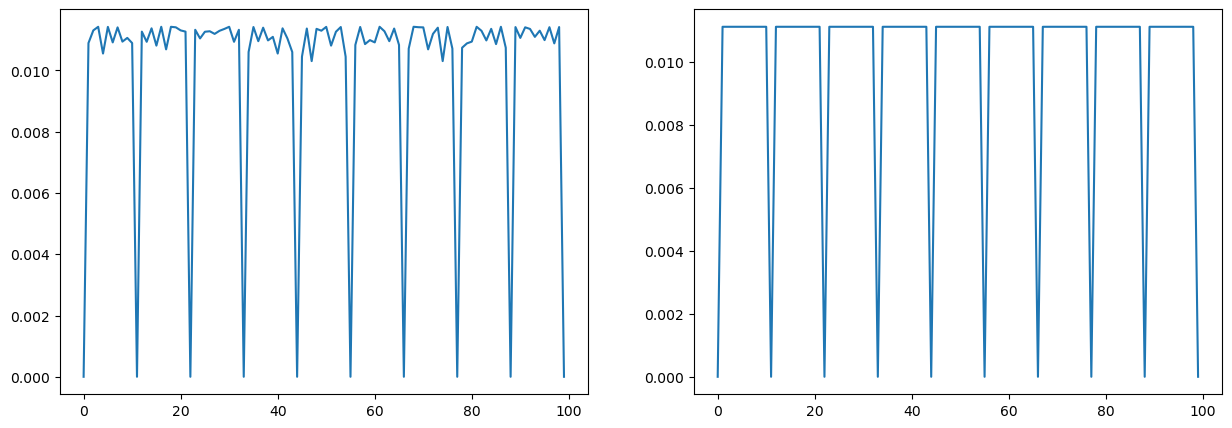

In [76]:
# Now we use neural network to estimate the manifold on R^3
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

def neg_squared_euc_dists(X):
    """Compute matrix containing negative squared euclidean
    distance for all pairs of points in input matrix X
    # Arguments:
        X: matrix of size NxD
    # Returns:
        NxN matrix D, with entry D_ij = negative squared
        euclidean distance between rows X_i and X_j
    """
    # Math? See https://stackoverflow.com/questions/37009647
    sum_X = np.sum(np.square(X), 1)
    D = np.add(np.add(-2 * np.dot(X, X.T), sum_X).T, sum_X)
    return -D

def neg_squared_euc_dists_torch(X):
    """Compute matrix containing negative squared euclidean
    distance for all pairs of points in input matrix X
    # Arguments:
        X: matrix of size NxD
    # Returns:
        NxN matrix D, with entry D_ij = negative squared
        euclidean distance between rows X_i and X_j
    """
    # Math? See https://stackoverflow.com/questions/37009647
    # print(f"Input shape: {X.shape}")
    sum_X = torch.sum(torch.square(X), dim = 1)
    # print(f"sum_X shape: {sum_X.shape}")
    # print(f"-2 * torch.dot(X, X.T) shape: {(-2 * torch.mm(X, X.T)).shape}")
    D = torch.add(torch.add(-2 * torch.mm(X, X.T), sum_X).T, sum_X)
    return -D

def softmax(X, diag_zero=True, zero_index=None):
    """Compute softmax values for each row of matrix X."""

    # Subtract max for numerical stability
    e_x = np.exp(X - np.max(X, axis=1).reshape([-1, 1]))

    # We usually want diagonal probailities to be 0.
    if zero_index is None:
        if diag_zero:
            np.fill_diagonal(e_x, 0.)
    else:
        e_x[:, zero_index] = 0.

    # Add a tiny constant for stability of log we take later
    e_x = e_x + 1e-8  # numerical stability

    return e_x / e_x.sum(axis=1).reshape([-1, 1])

def calc_prob_matrix(distances, sigmas=None, zero_index=None):
    """Convert a distances matrix to a matrix of probabilities."""
    if sigmas is not None:
        two_sig_sq = 2. * np.square(sigmas.reshape((-1, 1)))
        return softmax(distances / two_sig_sq, zero_index=zero_index)
    else:
        return softmax(distances, zero_index=zero_index)

def binary_search(eval_fn, target, tol=1e-10, max_iter=10000,
                  lower=1e-20, upper=1000.):
    """Perform a binary search over input values to eval_fn.
    # Arguments
        eval_fn: Function that we are optimising over.
        target: Target value we want the function to output.
        tol: Float, once our guess is this close to target, stop.
        max_iter: Integer, maximum num. iterations to search for.
        lower: Float, lower bound of search range.
        upper: Float, upper bound of search range.
    # Returns:
        Float, best input value to function found during search.
    """
    for i in range(max_iter):
        guess = (lower + upper) / 2.
        val = eval_fn(guess)
        if val > target:
            upper = guess
        else:
            lower = guess
        if np.abs(val - target) <= tol:
            break
    return guess

def calc_perplexity(prob_matrix):
    """Calculate the perplexity of each row
    of a matrix of probabilities."""
    entropy = -np.sum(prob_matrix * np.log2(prob_matrix), 1)
    perplexity = 2 ** entropy
    return perplexity

def perplexity(distances, sigmas, zero_index):
    """Wrapper function for quick calculation of
    perplexity over a distance matrix."""
    return calc_perplexity(
        calc_prob_matrix(distances, sigmas, zero_index))

def find_optimal_sigmas(distances, target_perplexity):
    """For each row of distances matrix, find sigma that results
    in target perplexity for that role."""
    sigmas = []
    # For each row of the matrix (each point in our dataset)
    for i in range(distances.shape[0]):
        # Make fn that returns perplexity of this row given sigma
        eval_fn = lambda sigma: \
            perplexity(distances[i:i+1, :], np.array(sigma), i)
        # Binary search over sigmas to achieve target perplexity
        correct_sigma = binary_search(eval_fn, target_perplexity)
        # Append the resulting sigma to our output array
        sigmas.append(correct_sigma)
    return np.array(sigmas)

def p_conditional_to_joint(P):
    """Given conditional probabilities matrix P, return
    approximation of joint distribution probabilities."""
    return (P + P.T) / (2. * P.shape[0])

def p_joint(X, target_perplexity):
    """Given a data matrix X, gives joint probabilities matrix.
    # Arguments
        X: Input data matrix.
    # Returns:
        P: Matrix with entries p_ij = joint probabilities.
    """
    # Get the negative euclidian distances matrix for our data
    distances = neg_squared_euc_dists(X)
    # Find optimal sigma for each row of this distances matrix
    sigmas = find_optimal_sigmas(distances, target_perplexity)
    # Calculate the probabilities based on these optimal sigmas
    p_conditional = calc_prob_matrix(distances, sigmas)
    # Go from conditional to joint probabilities matrix
    P = p_conditional_to_joint(p_conditional)
    
    # print(f"p_joint input: {X}")
    # print(f"distances: {distances}")
    # print(f"sigmas: {sigmas}")
    # print(f"p_conditional: {p_conditional[0]}")
    # print(f"check_valid: {p_conditional[0].sum()}")
    # input()

    return P

def q_tsne(Y):
    """t-SNE: Given low-dimensional representations Y, compute
    matrix of joint probabilities with entries q_ij."""
    distances = neg_squared_euc_dists_torch(Y)
    inv_distances = torch.pow(1. - distances, -1)
    inv_distances = inv_distances.fill_diagonal_(1e-8)
    return inv_distances / torch.sum(inv_distances), inv_distances


class TSNE_expanded(torch.nn.Module):

    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

model = TSNE_expanded()
loss_ftn = nn.KLDivLoss(reduction="batchmean", log_target=False)
optimizer = optim.Adam(model.parameters(), lr=0.01)

X_p_joint = p_joint(X, 20)
# print(f"X_p_joint sum: {X_p_joint[0].sum()}")
X_p_joint_torch = torch.tensor(X_p_joint, dtype=torch.float32)
print(X_p_joint_torch)
X_p_joint_torch = X_p_joint_torch.reshape(-1, )
# print(f"X_p_joint_torch sum: {X_p_joint_torch[0].sum()}")
X_torch = torch.tensor(X, dtype=torch.float32)

EPOCH = 1

for i in range(EPOCH):
    output_y = model(X_torch)
    output_t_dist, _ = q_tsne(output_y)
    print(output_t_dist.shape)
    output_t_dist = output_t_dist.reshape(-1, )
    loss = loss_ftn(X_p_joint_torch.log(), output_t_dist.log())
    loss.backward()

    optimizer.step()

    print(X_p_joint_torch)
    print(output_t_dist)

    
    if i % 10 == 0:
        print(loss.item())

fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(output_t_dist.detach().numpy()[:100])
ax = fig.add_subplot(1, 2, 2)
ax.plot(X_p_joint_torch.detach().numpy()[:100])



In [ ]:
# 2D swiss roll dataset

theta_array = np.arange(0, 4*np.pi, 0.1)

def make_swissroll(theta_array, angle_bias=0):
    X = np.concatenate(
        (
            (theta_array*np.cos(theta_array + angle_bias)).reshape((-1, 1)),
            (theta_array*np.sin(theta_array + angle_bias)).reshape((-1, 1))
            ), axis=1)
    return X

default_data = make_swissroll(theta_array)
pi_biased_data = make_swissroll(theta_array, angle_bias=np.pi)

total_data = np.vstack([default_data, pi_biased_data])

perplexity = 500

tsne = TSNE(
    n_components=1,
    perplexity=perplexity,
    random_state=42,
    verbose=True
)

train_embedding = tsne.fit(total_data)

X_min, X_max = min(total_data[:, 0]), max(total_data[:, 0])
Y_min, Y_max = min(total_data[:, 1]), max(total_data[:, 1])

X_axis = np.arange(X_min, X_max, 0.01)
Y_axis = np.arange(Y_min, Y_max, 0.01)

xv, yv = np.meshgrid(X_axis, Y_axis, indexing='ij')
test_input = np.concatenate((xv.reshape((-1, 1)), yv.reshape((-1, 1))), axis=1)
test_embedding = train_embedding.transform(test_input)

fig, ax = plt.subplots(1,3, figsize=(15, 5))

# Left plot
ax[0].scatter(default_data[:, 0], default_data[:, 1], c="m")
ax[0].scatter(pi_biased_data[:, 0], pi_biased_data[:, 1], c="b")
ax[0].set_title("Original dataset")
ax[0].axis("tight")

# Middle plot
default_embedding = train_embedding[:default_data.shape[0], 0]
pi_biased_embedding = train_embedding[default_data.shape[0]:, 0]
ax[1].scatter(default_embedding, np.zeros_like(default_embedding), c="m")
ax[1].scatter(pi_biased_embedding, np.zeros_like(pi_biased_embedding), c="b")
ax[1].set_title("1-D Embedding result")
ax[1].axis("tight")

#Right plot
ax[2].scatter(test_input[:, 0], test_input[:, 1], c=test_embedding)
ax[2].set_title("Embedding value for each point")
ax[2].axis("tight")

In [ ]:
## 4 swiss roll dataset

theta_array = np.arange(0, 4*np.pi, 0.1)

def make_swissroll(theta_array, angle_bias=0):
    X = np.concatenate(
        (
            (theta_array*np.cos(theta_array + angle_bias)).reshape((-1, 1)),
            (theta_array*np.sin(theta_array + angle_bias)).reshape((-1, 1))
            ), axis=1)
    return X

swissroll_0 = make_swissroll(theta_array)
swissroll_90 = make_swissroll(theta_array, angle_bias=np.pi/2)
swissroll_180 = make_swissroll(theta_array, angle_bias=np.pi)
swissroll_270 = make_swissroll(theta_array, angle_bias=3*np.pi/2)

total_data = np.vstack([swissroll_0, swissroll_90, swissroll_180, swissroll_270])

perplexity = 1000

tsne = TSNE(
    n_components=1,
    perplexity=perplexity,
    random_state=42,
    verbose=True
)

train_embedding = tsne.fit(total_data)

X_min, X_max = min(total_data[:, 0]), max(total_data[:, 0])
Y_min, Y_max = min(total_data[:, 1]), max(total_data[:, 1])

X_axis = np.arange(X_min, X_max, 0.01)
Y_axis = np.arange(Y_min, Y_max, 0.01)

xv, yv = np.meshgrid(X_axis, Y_axis, indexing='ij')
test_input = np.concatenate((xv.reshape((-1, 1)), yv.reshape((-1, 1))), axis=1)
test_embedding = train_embedding.transform(test_input)

fig, ax = plt.subplots(1,3, figsize=(15, 5))

# Left plot
ax[0].scatter(swissroll_0[:, 0], swissroll_0[:, 1])
ax[0].scatter(swissroll_90[:, 0], swissroll_90[:, 1])
ax[0].scatter(swissroll_180[:, 0], swissroll_180[:, 1])
ax[0].scatter(swissroll_270[:, 0], swissroll_270[:, 1])
ax[0].set_title("Original dataset")
ax[0].axis("tight")

# Middle plot
embedding_0 = train_embedding[:swissroll_0.shape[0], 0]
embedding_90 = train_embedding[:swissroll_90.shape[0], 0]
embedding_180 = train_embedding[:swissroll_180.shape[0], 0]
embedding_270 = train_embedding[:swissroll_270.shape[0], 0]
ax[1].scatter(embedding_0, np.zeros_like(embedding_0))
ax[1].scatter(embedding_90, np.zeros_like(embedding_90))
ax[1].scatter(embedding_180, np.zeros_like(embedding_180))
ax[1].scatter(embedding_270, np.zeros_like(embedding_270))
ax[1].set_title("1-D Embedding result")
ax[1].axis("tight")

#Right plot
ax[2].scatter(test_input[:, 0], test_input[:, 1], c=test_embedding)
ax[2].set_title("Embedding value for each point")
ax[2].axis("tight")